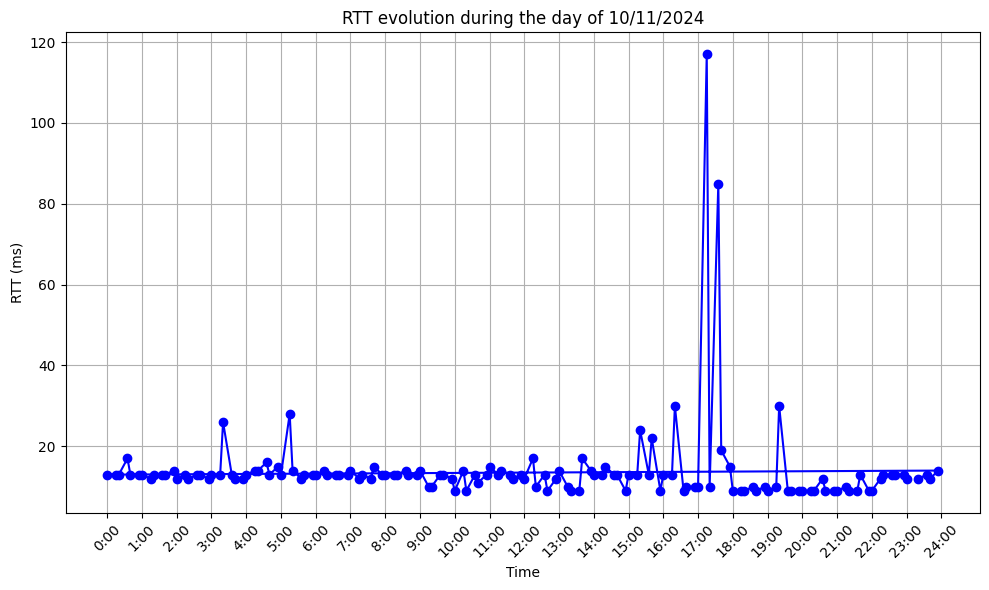

In [3]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# Configuration
input_file = "rtt_metrics_python.csv"

# Lire le fichier CSV
timestamps = []
rtt_values = []

with open(input_file, mode='r') as file:
    csv_reader = csv.reader(file, delimiter=';')
    next(csv_reader)  # Passer l'en-tête
    for row in csv_reader:
        timestamp = datetime.strptime(row[0], '%H:%M')
        rtt = int(row[1].split()[0])  # Extraire la valeur numérique du RTT
        timestamps.append(timestamp)
        rtt_values.append(rtt)

# Convertir les timestamps en minutes depuis minuit pour l'affichage
minutes_since_midnight = [ts.hour * 60 + ts.minute for ts in timestamps]

# Plotter les données
plt.figure(figsize=(10, 6))
plt.plot(minutes_since_midnight, rtt_values, marker='o', linestyle='-', color='b')

# Configurer les étiquettes des axes
plt.xlabel('Time')
plt.ylabel('RTT (ms)')
plt.title('RTT evolution during the day of 10/11/2024')

# Configurer les ticks des axes pour montrer des heures au lieu de minutes
plt.xticks(range(0, 1441, 60), [f'{i // 60}:00' for i in range(0, 1441, 60)], rotation=45)

# Ajouter une grille
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()
